In [0]:
import pandas as pd
from google.colab import drive

drive.mount('/gdrive')

path = "/gdrive/My Drive/Colab Notebooks/datastore/SpanishHSR/renfe.csv"
hsrdata = pd.read_csv(path)
hsrdata.head()

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare
0,2019-04-11 21:49:46,MADRID,BARCELONA,2019-04-18 05:50:00,2019-04-18 08:55:00,AVE,68.95,Preferente,Promo
1,2019-04-11 21:49:46,MADRID,BARCELONA,2019-04-18 06:30:00,2019-04-18 09:20:00,AVE,75.40,Turista,Promo
2,2019-04-11 21:49:46,MADRID,BARCELONA,2019-04-18 07:00:00,2019-04-18 09:30:00,AVE,106.75,Turista Plus,Promo
3,2019-04-11 21:49:46,MADRID,BARCELONA,2019-04-18 07:30:00,2019-04-18 10:40:00,AVE,90.50,Turista Plus,Promo
4,2019-04-11 21:49:46,MADRID,BARCELONA,2019-04-18 08:00:00,2019-04-18 10:30:00,AVE,88.95,Turista,Promo


In [0]:

import pandas as pd
import numpy as np
import pickle
import datetime
import math
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
hsrdata.isna().sum()

insert_date         0
origin              0
destination         0
start_date          0
end_date            0
train_type          0
price          573121
train_class     26690
fare            26690
dtype: int64

In [0]:
hsrdata.count

<bound method DataFrame.count of                  insert_date    origin  ...   train_class        fare
0        2019-04-11 21:49:46    MADRID  ...    Preferente       Promo
1        2019-04-11 21:49:46    MADRID  ...       Turista       Promo
2        2019-04-11 21:49:46    MADRID  ...  Turista Plus       Promo
3        2019-04-11 21:49:46    MADRID  ...  Turista Plus       Promo
4        2019-04-11 21:49:46    MADRID  ...       Turista       Promo
...                      ...       ...  ...           ...         ...
7671349  2019-05-25 21:26:25  VALENCIA  ...       Turista  Adulto ida
7671350  2019-05-25 21:26:25  VALENCIA  ...       Turista       Promo
7671351  2019-05-25 21:26:25  VALENCIA  ...       Turista       Promo
7671352  2019-05-25 21:26:25  VALENCIA  ...       Turista       Promo
7671353  2019-05-25 21:26:25  VALENCIA  ...       Turista       Promo

[7671354 rows x 9 columns]>

In [0]:
hsrdata.dropna(inplace=True) 
hsrdata.count

<bound method DataFrame.count of                  insert_date    origin  ...   train_class        fare
0        2019-04-11 21:49:46    MADRID  ...    Preferente       Promo
1        2019-04-11 21:49:46    MADRID  ...       Turista       Promo
2        2019-04-11 21:49:46    MADRID  ...  Turista Plus       Promo
3        2019-04-11 21:49:46    MADRID  ...  Turista Plus       Promo
4        2019-04-11 21:49:46    MADRID  ...       Turista       Promo
...                      ...       ...  ...           ...         ...
7671349  2019-05-25 21:26:25  VALENCIA  ...       Turista  Adulto ida
7671350  2019-05-25 21:26:25  VALENCIA  ...       Turista       Promo
7671351  2019-05-25 21:26:25  VALENCIA  ...       Turista       Promo
7671352  2019-05-25 21:26:25  VALENCIA  ...       Turista       Promo
7671353  2019-05-25 21:26:25  VALENCIA  ...       Turista       Promo

[7098233 rows x 9 columns]>

In [0]:
hsrdata.drop(["insert_date"], axis = 1, inplace = True) #These values doesn't effect
hsrdata.head()

,origin,destination,start_date,end_date,train_type,price,train_class,fare
0,MADRID,BARCELONA,2019-04-18 05:50:00,2019-04-18 08:55:00,AVE,68.95,Preferente,Promo
1,MADRID,BARCELONA,2019-04-18 06:30:00,2019-04-18 09:20:00,AVE,75.40,Turista,Promo
2,MADRID,BARCELONA,2019-04-18 07:00:00,2019-04-18 09:30:00,AVE,106.75,Turista Plus,Promo
3,MADRID,BARCELONA,2019-04-18 07:30:00,2019-04-18 10:40:00,AVE,90.50,Turista Plus,Promo
4,MADRID,BARCELONA,2019-04-18 08:00:00,2019-04-18 10:30:00,AVE,88.95,Turista,Promo


In [0]:
data = hsrdata.values

In [0]:
lab_encoder = LabelEncoder()
hsrdata.iloc[:,0] = lab_encoder.fit_transform(hsrdata.iloc[:,0])
hsrdata.iloc[:,1] = lab_encoder.fit_transform(hsrdata.iloc[:,1])
hsrdata.iloc[:,4] = lab_encoder.fit_transform(hsrdata.iloc[:,4])
hsrdata.iloc[:,6] = lab_encoder.fit_transform(hsrdata.iloc[:,6])
hsrdata.iloc[:,7] = lab_encoder.fit_transform(hsrdata.iloc[:,7])

hsrdata.head()

,origin,destination,start_date,end_date,train_type,price,train_class,fare
0,1,0,2019-04-18 05:50:00,2019-04-18 08:55:00,2,68.95,2,8
1,1,0,2019-04-18 06:30:00,2019-04-18 09:20:00,2,75.40,4,8
2,1,0,2019-04-18 07:00:00,2019-04-18 09:30:00,2,106.75,5,8
3,1,0,2019-04-18 07:30:00,2019-04-18 10:40:00,2,90.50,5,8
4,1,0,2019-04-18 08:00:00,2019-04-18 10:30:00,2,88.95,4,8


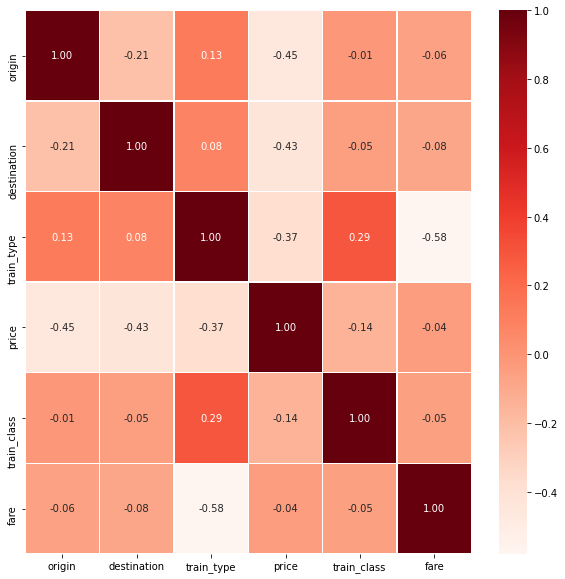

In [0]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(hsrdata.corr(), annot=True, cmap = "Reds", linewidths=.5, fmt= '.2f',ax = ax)
plt.show()

In [0]:
start = hsrdata['start_date'].values
end = hsrdata['end_date'].values
datetimeFormat = '%Y-%m-%d %H:%M:%S'
duration = []
for i in range(len(start)):
    diff = datetime.datetime.strptime(end[i], datetimeFormat)- datetime.datetime.strptime(start[i], datetimeFormat)
    duration.append(diff.seconds)
hsrdata['duration'] = duration

hsrdata.head()

,origin,destination,start_date,end_date,train_type,price,train_class,fare,duration
0,1,0,2019-04-18 05:50:00,2019-04-18 08:55:00,2,68.95,2,8,11100
1,1,0,2019-04-18 06:30:00,2019-04-18 09:20:00,2,75.40,4,8,10200
2,1,0,2019-04-18 07:00:00,2019-04-18 09:30:00,2,106.75,5,8,9000
3,1,0,2019-04-18 07:30:00,2019-04-18 10:40:00,2,90.50,5,8,11400
4,1,0,2019-04-18 08:00:00,2019-04-18 10:30:00,2,88.95,4,8,9000


In [0]:
start_day_of_week = []
for i in start:
    start_day_of_week.append(datetime.datetime.strptime(i,datetimeFormat).weekday())
end_day_of_week = []
for i in end:
    end_day_of_week.append(datetime.datetime.strptime(i,datetimeFormat).weekday())
hsrdata['start_DOW'] = start_day_of_week
hsrdata['end_DOW'] = end_day_of_week

hsrdata.head()

,origin,destination,start_date,end_date,train_type,price,train_class,fare,duration,start_DOW,end_DOW
0,1,0,2019-04-18 05:50:00,2019-04-18 08:55:00,2,68.95,2,8,11100,3,3
1,1,0,2019-04-18 06:30:00,2019-04-18 09:20:00,2,75.40,4,8,10200,3,3
2,1,0,2019-04-18 07:00:00,2019-04-18 09:30:00,2,106.75,5,8,9000,3,3
3,1,0,2019-04-18 07:30:00,2019-04-18 10:40:00,2,90.50,5,8,11400,3,3
4,1,0,2019-04-18 08:00:00,2019-04-18 10:30:00,2,88.95,4,8,9000,3,3


In [0]:
#Converting datetime to cyclic features for departure times
hr_cos = [] 
hr_sin = []
min_cos = []
min_sin = []
data = hsrdata['start_date'].values
for i in range(len(data)):
    time_obj = datetime.datetime.strptime(data[i],'%Y-%m-%d %H:%M:%S')
    hr = time_obj.hour
    minute = time_obj.minute
    sample_hr_sin = math.sin(hr*(2.*math.pi/24))
    sample_hr_cos = math.cos(hr*(2.*math.pi/24))
    sample_min_sin = math.sin(minute*(2.*math.pi/60))
    sample_min_cos = math.cos(minute*(2.*math.pi/60))
    hr_cos.append(sample_hr_cos)
    hr_sin.append(sample_hr_sin)
    min_cos.append(sample_min_cos)
    min_sin.append(sample_min_sin)
hsrdata['start_time_hr_sin'] = hr_sin
hsrdata['start_time_hr_cos'] = hr_cos
hsrdata['start_time_min_sin'] = min_sin
hsrdata['start_time_min_cos'] = min_cos

#Converting datetime to cyclic features for arrival times
hr_cos = [] 
hr_sin = []
min_cos = []
min_sin = []
data = hsrdata['end_date'].values
for i in range(len(data)):
    time_obj = datetime.datetime.strptime(data[i],'%Y-%m-%d %H:%M:%S')
    hr = time_obj.hour
    minute = time_obj.minute
    sample_hr_sin = math.sin(hr*(2.*math.pi/24))
    sample_hr_cos = math.cos(hr*(2.*math.pi/24))
    sample_min_sin = math.sin(minute*(2.*math.pi/60))
    sample_min_cos = math.cos(minute*(2.*math.pi/60))
    hr_cos.append(sample_hr_cos)
    hr_sin.append(sample_hr_sin)
    min_cos.append(sample_min_cos)
    min_sin.append(sample_min_sin)
hsrdata['end_time_hr_sin'] = hr_sin
hsrdata['end_time_hr_cos'] = hr_cos
hsrdata['end_time_min_sin'] = min_sin
hsrdata['end_time_min_cos'] = min_cos

In [0]:
hsrdata.drop(["start_date"], axis = 1, inplace = True)
hsrdata.drop(["end_date"], axis = 1, inplace = True)

hsrdata.head()

,origin,destination,train_type,price,train_class,fare,duration,start_DOW,end_DOW,start_time_hr_sin,start_time_hr_cos,start_time_min_sin,start_time_min_cos,end_time_hr_sin,end_time_hr_cos,end_time_min_sin,end_time_min_cos
0,1,0,2,68.95,2,8,11100,3,3,0.965926,2.588190e-01,-8.660254e-01,0.5,0.866025,-0.500000,-5.000000e-01,0.866025
1,1,0,2,75.40,4,8,10200,3,3,1.000000,6.123234e-17,1.224647e-16,-1.0,0.707107,-0.707107,8.660254e-01,-0.500000
2,1,0,2,106.75,5,8,9000,3,3,0.965926,-2.588190e-01,0.000000e+00,1.0,0.707107,-0.707107,1.224647e-16,-1.000000
3,1,0,2,90.50,5,8,11400,3,3,0.965926,-2.588190e-01,1.224647e-16,-1.0,0.500000,-0.866025,-8.660254e-01,-0.500000
4,1,0,2,88.95,4,8,9000,3,3,0.866025,-5.000000e-01,0.000000e+00,1.0,0.500000,-0.866025,1.224647e-16,-1.000000


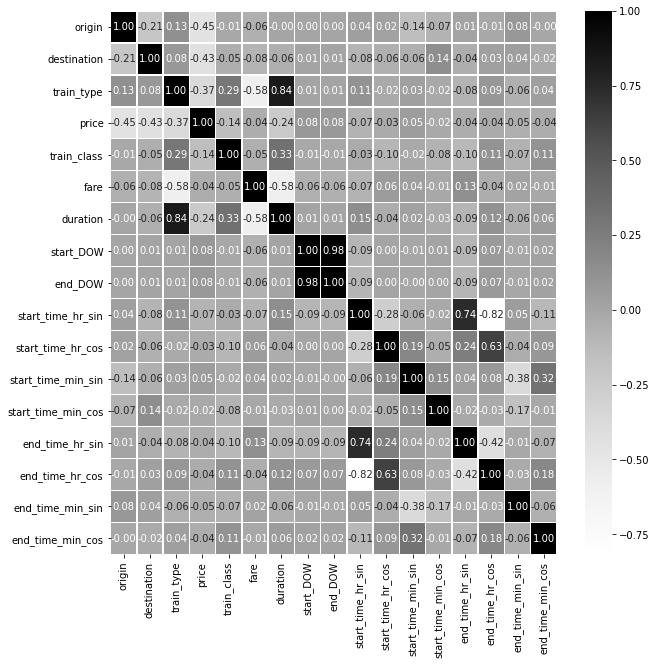

In [0]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(hsrdata.corr(), annot=True, cmap = "Greys", linewidths=.5, fmt= '.2f',ax = ax)
plt.show()

In [0]:
sc = MinMaxScaler(copy=False, feature_range = (0, 1))

hsrdata['origin'] = sc.fit_transform(hsrdata['origin'].values.reshape(-1,1))
hsrdata['destination'] = sc.fit_transform(hsrdata['destination'].values.reshape(-1,1))
hsrdata['train_type'] = sc.fit_transform(hsrdata['train_type'].values.reshape(-1,1))
hsrdata['train_class'] = sc.fit_transform(hsrdata['train_class'].values.reshape(-1,1))
hsrdata['fare'] = sc.fit_transform(hsrdata['fare'].values.reshape(-1,1))
hsrdata['start_DOW'] = sc.fit_transform(hsrdata['start_DOW'].values.reshape(-1,1))
hsrdata['end_DOW'] = sc.fit_transform(hsrdata['end_DOW'].values.reshape(-1,1))
hsrdata['duration'] = sc.fit_transform(hsrdata['duration'].values.reshape(-1,1))
hsrdata['price'] = sc.fit_transform(hsrdata['price'].values.reshape(-1,1))

hsrdata.head()

,origin,destination,train_type,price,train_class,fare,duration,start_DOW,end_DOW,start_time_hr_sin,start_time_hr_cos,start_time_min_sin,start_time_min_cos,end_time_hr_sin,end_time_hr_cos,end_time_min_sin,end_time_min_cos
0,0.25,0.0,0.142857,0.201138,0.250,0.888889,0.134467,0.5,0.5,0.965926,2.588190e-01,-8.660254e-01,0.5,0.866025,-0.500000,-5.000000e-01,0.866025
1,0.25,0.0,0.142857,0.219953,0.500,0.888889,0.111283,0.5,0.5,1.000000,6.123234e-17,1.224647e-16,-1.0,0.707107,-0.707107,8.660254e-01,-0.500000
2,0.25,0.0,0.142857,0.311406,0.625,0.888889,0.080371,0.5,0.5,0.965926,-2.588190e-01,0.000000e+00,1.0,0.707107,-0.707107,1.224647e-16,-1.000000
3,0.25,0.0,0.142857,0.264002,0.625,0.888889,0.142195,0.5,0.5,0.965926,-2.588190e-01,1.224647e-16,-1.0,0.500000,-0.866025,-8.660254e-01,-0.500000
4,0.25,0.0,0.142857,0.259481,0.500,0.888889,0.080371,0.5,0.5,0.866025,-5.000000e-01,0.000000e+00,1.0,0.500000,-0.866025,1.224647e-16,-1.000000


In [0]:
#data = hsrdata.values
#Y = data[:,3]
#X = np.delete(data,3,1)
#Creating different data splits for training,validation and testing!

tr, val, ts = np.split(hsrdata.sample(frac=1), [int(.6*len(hsrdata)), int(.8*len(hsrdata))])

train = tr.values
validate = val.values
test = ts.values

y_train = train[:,3]
x_train = np.delete(train,3,1)
y_validation = validate[:,3]
x_validation = np.delete(validate,3,1)
y_test = test[:,3]
x_test = np.delete(test,3,1)

In [0]:
print("x_train : ", x_train.shape) 
print("y_train : ", y_train.shape) 

print("x_validation : ", x_validation.shape)
print("y_validation : ", y_validation.shape) 

print("x_test : ", x_test.shape)
print("y_test : ", y_test.shape)

x_train :  (4258939, 16)
y_train :  (4258939,)
x_validation :  (1419647, 16)
y_validation :  (1419647,)
x_test :  (1419647, 16)
y_test :  (1419647,)


In [0]:
import keras
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Input,Dense
from keras.models import Model
from keras.layers import LSTM
from keras.layers import Dropout
from keras.optimizers import Nadam
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


#Dense Net

In [0]:
#input_layer = tf.keras.Input((x_train.shape[1],))
dnn_classifier = tf.keras.models.Sequential()
dnn_classifier.add(tf.keras.layers.Dense(units=64,kernel_initializer='he_normal',activation='tanh', input_shape= (x_train.shape[1],)))#(input_layer)
#dnn_classifier.add(tf.keras.layers.Dropout(0.2))
dnn_classifier.add(tf.keras.layers.Dense(units=8,kernel_initializer='he_normal',activation='sigmoid'))#(y)
#dnn_classifier.add(tf.keras.layers.Dropout(0.2))
dnn_classifier.add(tf.keras.layers.Dense(units=1,kernel_initializer='he_normal',activation='sigmoid'))#(y)
#dnn_classifier.add(tf.keras.layers.Dropout(0.2))
dnn_classifier.add(tf.keras.layers.Dense(units=1,kernel_initializer='he_normal',activation='tanh'))#(y)
#dnn_classifier = tf.keras.models.Model(inputs=input_layer,outputs=y)
dnn_classifier.compile(optimizer='adam',loss='mean_squared_error', metrics=['accuracy'])
dnn_classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1088      
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 520       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 2         
Total params: 1,619
Trainable params: 1,619
Non-trainable params: 0
_________________________________________________________________


In [0]:
save = tf.keras.callbacks.ModelCheckpoint('/gdrive/My Drive/Colab Notebooks/datastore/SpanishHSR/hsr_dnn_classifier_2.hdf5',
                                          monitor='val_loss',
                                          mode='min',save_best_only=True)

history = dnn_classifier.fit(x_train,y_train,
                    validation_data=(x_validation,y_validation),
                    epochs = 100,
                    batch_size=2048,
                    callbacks=[save])

Epoch 1/100
2080/2080 [==============================] - 6s 3ms/step - loss: 0.0063 - accuracy: 7.7484e-06 - val_loss: 0.0014 - val_accuracy: 7.7484e-06
Epoch 2/100
2080/2080 [==============================] - 5s 2ms/step - loss: 0.0011 - accuracy: 7.7484e-06 - val_loss: 9.4320e-04 - val_accuracy: 7.7484e-06
Epoch 3/100
2080/2080 [==============================] - 5s 2ms/step - loss: 8.5294e-04 - accuracy: 7.7484e-06 - val_loss: 7.6721e-04 - val_accuracy: 7.7484e-06
Epoch 4/100
2080/2080 [==============================] - 5s 2ms/step - loss: 7.1216e-04 - accuracy: 7.7484e-06 - val_loss: 6.7307e-04 - val_accuracy: 7.7484e-06
Epoch 5/100
2080/2080 [==============================] - 5s 2ms/step - loss: 6.4847e-04 - accuracy: 7.7484e-06 - val_loss: 6.3216e-04 - val_accuracy: 7.7484e-06
Epoch 6/100
2080/2080 [==============================] - 5s 2ms/step - loss: 6.2205e-04 - accuracy: 7.5136e-06 - val_loss: 6.1705e-04 - val_accuracy: 7.7484e-06
Epoch 7/100
2080/2080 [=======================

In [0]:
history = dnn_classifier.load_weights('/gdrive/My Drive/Colab Notebooks/datastore/SpanishHSR/hsr_dnn_classifier_2.hdf5')

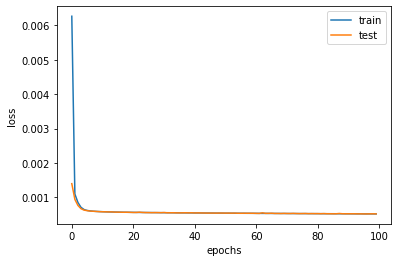

In [0]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()
plt.show()

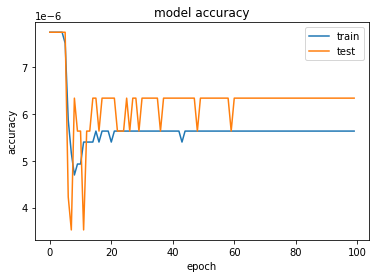

In [0]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [0]:
pred = dnn_classifier.predict(x_test)

In [0]:
pred = sc.inverse_transform(pred)
y_test_inv = sc.inverse_transform(y_test)

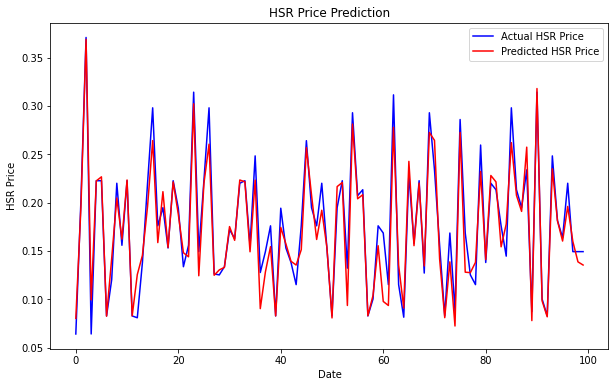

In [0]:
plt.figure(figsize=(10,6))
plt.plot(y_test[:100], color='blue', label='Actual HSR Price')
plt.plot(pred[:100] , color='red', label='Predicted HSR Price')
plt.title('HSR Price Prediction')
plt.xlabel('Date')
plt.ylabel('HSR Price')
plt.legend()
plt.show()  

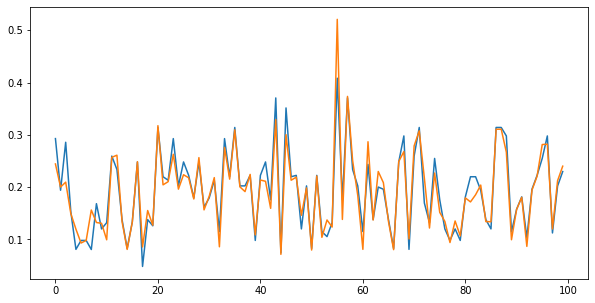

In [0]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(range(len(y_test[:100])), y_test[:100], label='actual')
ax.plot(range(len(y_test[:100])), pred[:100], label='predicted')

In [0]:
#model.load_weights('hsr_dnn_classifier_2.hdf5') #this will load the best model that we saved earlier
scores = dnn_classifier.evaluate(x_test,y_test)
print("Test Set  RMSE(before scaling ):",scores[0])

44364/44364 [==============================] - 62s 1ms/step - loss: 5.2417e-04 - accuracy: 2.8176e-06
Test Set  RMSE(before scaling ): 0.0005241737235337496


In [0]:
print("Test Set  RMSE(before scaling ):",scores[1])

Test Set  RMSE(before scaling ): 4.22640277975006e-06


In [0]:
mae = np.sum(np.abs(y_test - pred))
print(mae)

# LSTM-RNN


In [0]:
labels = []
features_set = []
for i in range(100, 4258939):
    features_set.append(train[i-60:i, 0])
    labels.append(train[i, 0])

labels = np.array(labels)
features_set = np.array(features_set)

In [0]:
features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))

In [0]:
lstm_rnn_classifier = tf.keras.models.Sequential()
lstm_rnn_classifier.add(tf.keras.layers.LSTM(units=50, return_sequences=True, activation='tanh', input_shape=(features_set.shape[1], 1)))
lstm_rnn_classifier.add(tf.keras.layers.Dropout(0.2))
lstm_rnn_classifier.add(tf.keras.layers.LSTM(units=50, activation='tanh', return_sequences=True) )
lstm_rnn_classifier.add(tf.keras.layers.Dropout(0.2))
lstm_rnn_classifier.add(tf.keras.layers.LSTM(units=50, activation='tanh', return_sequences=True))
lstm_rnn_classifier.add(tf.keras.layers.Dropout(0.2))
lstm_rnn_classifier.add(tf.keras.layers.Dense(units = 1, activation='sigmoid'))
lstm_rnn_classifier.compile(optimizer = 'adam', loss = 'mean_squared_error')

lstm_rnn_classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            10400     
_________________________________________________________________
dropout (Dropout)            (None, 60, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
dense (Dense)                (None, 60, 1)             5

In [0]:
save = tf.keras.callbacks.ModelCheckpoint('/gdrive/My Drive/Colab Notebooks/datastore/SpanishHSR/hsr_lstm_rnn_classifier.hdf5',
                                          monitor='val_loss',
                                          mode='min')

history = lstm_rnn_classifier.fit(features_set,labels,
                    epochs = 100,
                    batch_size=2048,
                    callbacks=[save])

Epoch 1/100
2080/2080 [==============================] - 83s 40ms/step - loss: 0.1096
Epoch 2/100
2080/2080 [==============================] - 82s 40ms/step - loss: 0.1095
Epoch 3/100
2080/2080 [==============================] - 82s 39ms/step - loss: 0.1095
Epoch 4/100
2080/2080 [==============================] - 82s 39ms/step - loss: 0.1095
Epoch 5/100
2080/2080 [==============================] - 82s 39ms/step - loss: 0.1095
Epoch 6/100
2080/2080 [==============================] - 82s 40ms/step - loss: 0.1095
Epoch 7/100
2080/2080 [==============================] - 82s 39ms/step - loss: 0.1095
Epoch 8/100
2080/2080 [==============================] - 82s 39ms/step - loss: 0.1095
Epoch 9/100
2080/2080 [==============================] - 82s 39ms/step - loss: 0.1095
Epoch 10/100
2080/2080 [==============================] - 82s 40ms/step - loss: 0.1095
Epoch 11/100
2080/2080 [==============================] - 82s 40ms/step - loss: 0.1095
Epoch 12/100
2080/2080 [============================

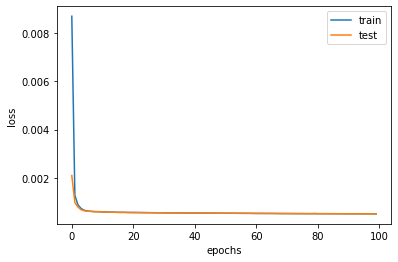

In [0]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()
plt.show()

In [0]:
history = lstm_rnn_classifier.load_weights('/gdrive/My Drive/Colab Notebooks/datastore/SpanishHSR/lstm_rnn_classifier.hdf5')